<a href="https://colab.research.google.com/github/Itzz-Hashan/Client-Prediction-System/blob/main/CM2604/CLIENT_PREDICTION_20230657.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# ML Coursework



##Data preproccesing

###Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Separate columns in dataset

In [3]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

new_file = ('new_bank-additional-full.csv')
df.to_csv(new_file,index=False)

print(f"Dataset saved as {new_file}")

Dataset saved as new_bank-additional-full.csv


###Data importing

In [4]:
df = pd.read_csv('new_bank-additional-full.csv')

df.sample(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5009,37,services,married,basic.6y,no,no,no,telephone,may,wed,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
29242,36,technician,married,professional.course,no,yes,no,cellular,apr,fri,...,4,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
13278,55,retired,married,basic.9y,unknown,unknown,unknown,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
19569,36,admin.,married,university.degree,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
4174,30,technician,single,professional.course,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
26454,30,admin.,single,basic.9y,no,no,no,telephone,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
10269,50,technician,divorced,professional.course,no,no,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
39514,46,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,2,6,2,success,-1.8,93.749,-34.6,0.645,5008.7,no
28206,46,technician,married,basic.6y,no,no,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
23326,57,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no


###Handaling the duplicates data

In [5]:
count=df.duplicated().sum()
print(f"Duplicates-{count}")

Duplicates-12


In [6]:
if count>0:
  duplicates=df[df.duplicated()]
  print(duplicates)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [7]:
df_clean = df.drop_duplicates()
print(f"Dataset without duplicates-{df_clean.shape}")

Dataset without duplicates-(41176, 21)


###removing unwanted columns

In [10]:

df= df_clean.drop('duration', axis=1)
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29955,40.0,admin.,single,university.degree,no,yes,yes,cellular,apr,mon,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3019,30.0,admin.,married,university.degree,no,yes,no,telephone,may,wed,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
8962,58.0,entrepreneur,divorced,university.degree,no,no,no,telephone,jun,thu,2.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
18293,33.0,services,married,professional.course,no,yes,no,cellular,jul,wed,3.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
12071,42.0,admin.,single,high.school,no,no,no,telephone,jun,fri,2.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.947,5228.1,no
26353,29.0,admin.,married,high.school,no,no,no,cellular,nov,thu,2.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
13086,33.0,admin.,married,university.degree,no,yes,no,cellular,jul,tue,5.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
20095,38.0,admin.,married,university.degree,no,yes,no,cellular,aug,mon,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
3436,44.0,services,married,high.school,unknown,yes,no,telephone,may,thu,2.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,yes
21430,31.0,admin.,married,university.degree,no,yes,no,telephone,aug,tue,4.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


###Handling outliers

####Check How many Outliers

In [17]:


import pandas as pd
import numpy as np



def count_outliers(df):

    outlier_counts = {}
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts


outlier_counts = count_outliers(df)

for col, count in outlier_counts.items():
  print(f"Column '{col}': {count} outliers")

Column 'age': 469 outliers
Column 'duration': 2963 outliers
Column 'campaign': 2406 outliers
Column 'pdays': 1515 outliers
Column 'previous': 5625 outliers
Column 'emp.var.rate': 0 outliers
Column 'cons.price.idx': 0 outliers
Column 'cons.conf.idx': 447 outliers
Column 'euribor3m': 0 outliers
Column 'nr.employed': 0 outliers


####Display outliers in a box plot

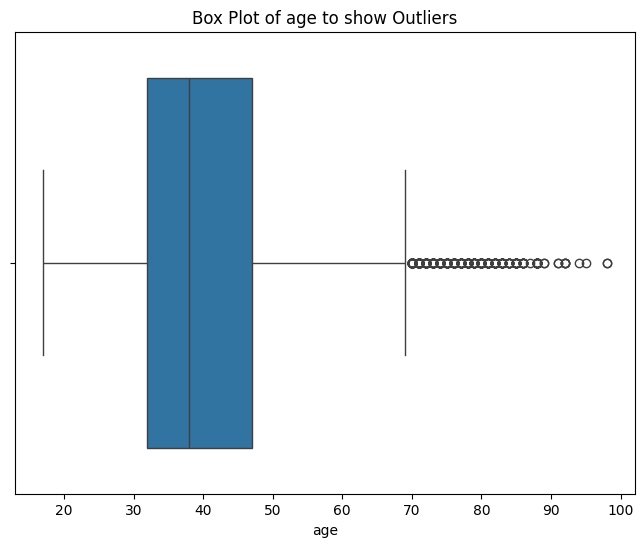

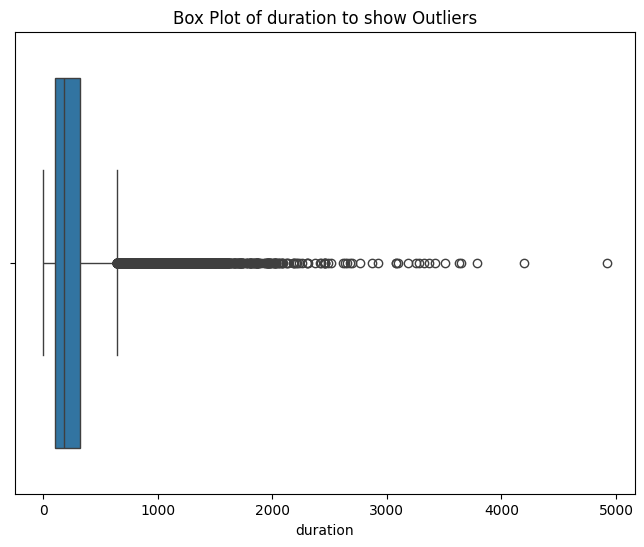

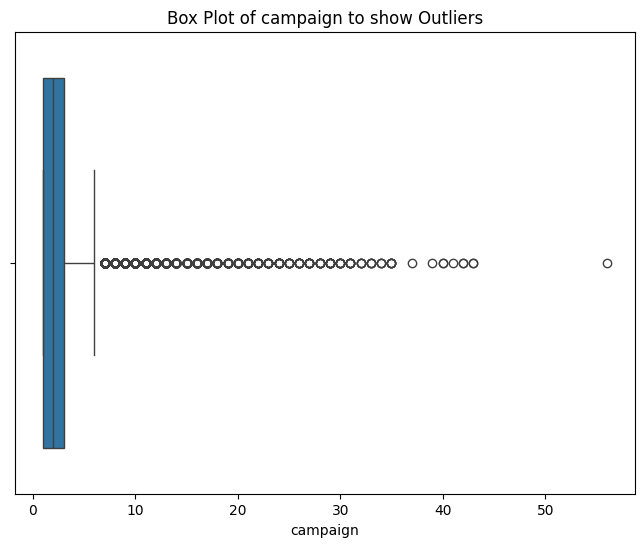

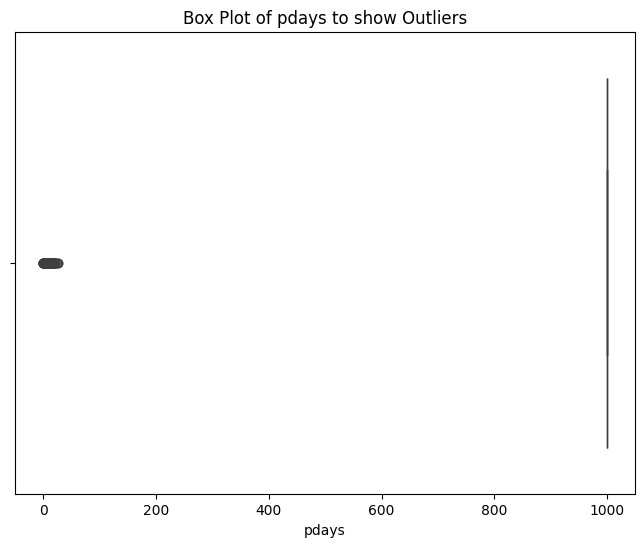

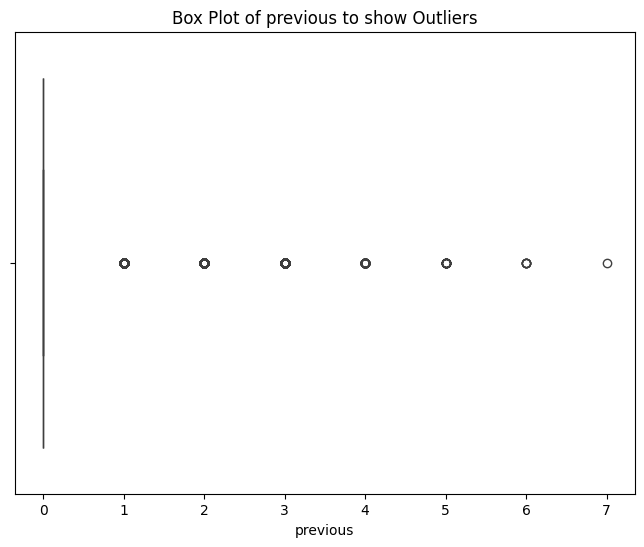

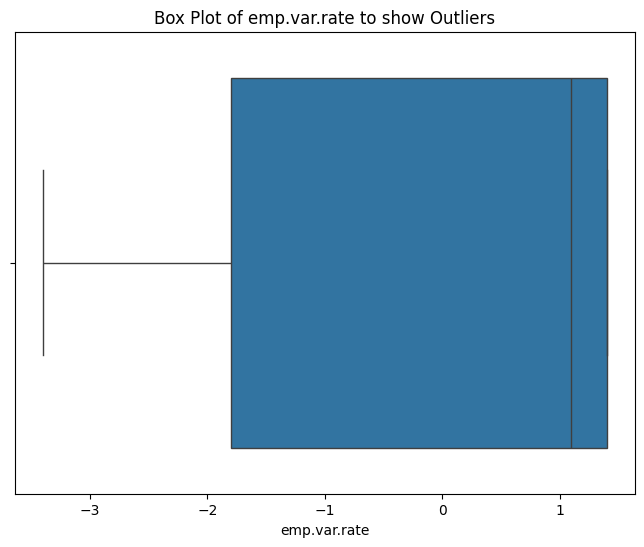

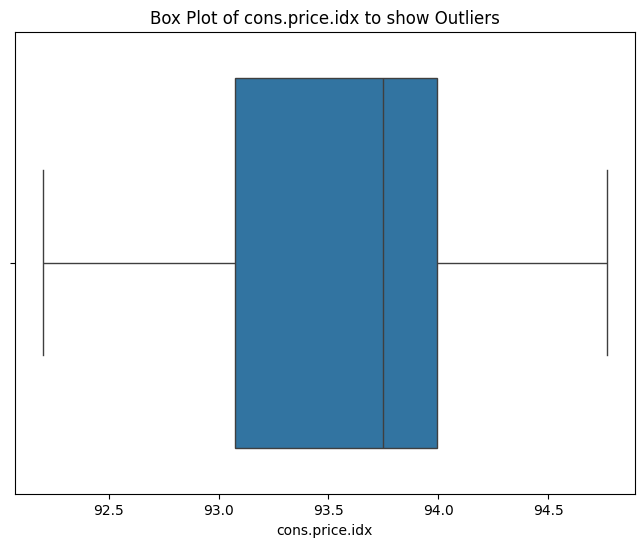

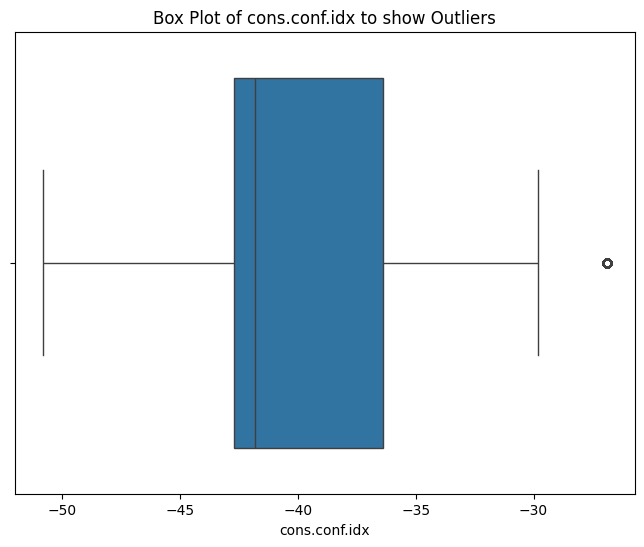

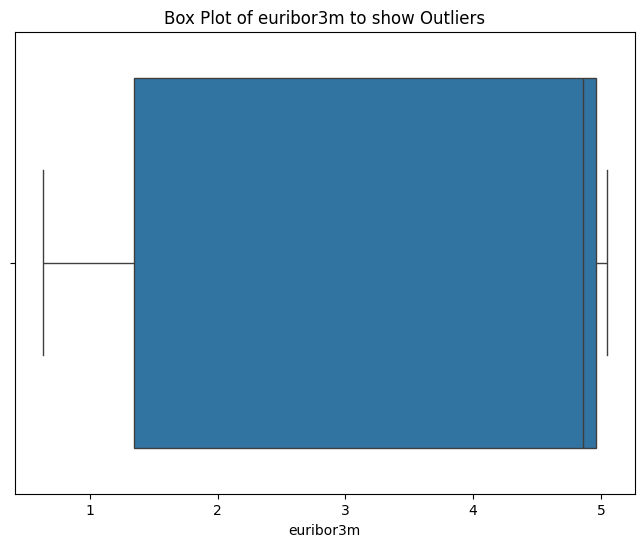

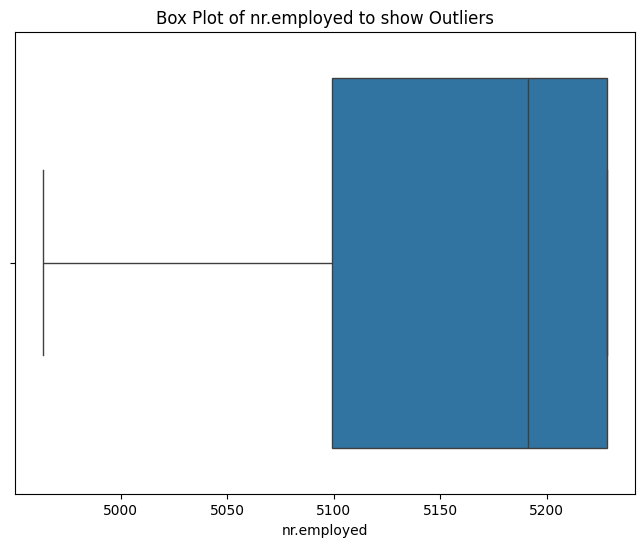

In [18]:


import matplotlib.pyplot as plt
import seaborn as sns




def display_outliers(df):
    for col in df.select_dtypes(include=np.number):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} to show Outliers')
        plt.xlabel(col)
        plt.show()

display_outliers(df)